```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. https://github.com/ResidentMario/missingno
https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/
https://www.scikit-yb.org/en/latest/quickstart.html#walkthrough

```

# Exploring Data (EDA)
By understanding the business and the data, you are able to create better models and have a better impact on their business. EDA gives us a feel for the data, but also is a great excuse to meet and discuss issues with business units that control that data.

In [22]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from datasets import (
    get_dataset
)

In [24]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [25]:
df = get_dataset('titanic3')

## Data Size

In [26]:
df.shape

(1309, 14)

## Summary Stats

In [27]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [28]:
# First and last columns
df.describe().iloc[:, [0, -1]]

,pclass,body
count,1309.000000,121.000000
mean,2.294882,160.809917
std,0.837836,97.696922
min,1.000000,1.000000
25%,2.000000,72.000000
50%,3.000000,155.000000
75%,3.000000,256.000000
max,3.000000,328.000000


## Histogram
A histogram is a great tool to visualize numeric data.

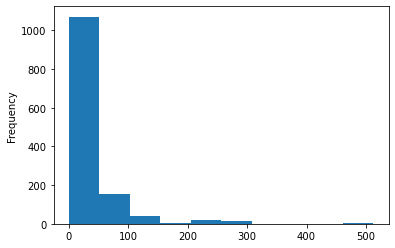

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))
df.fare.plot(kind="hist", ax=ax)
fig.savefig("images/eda_histogram.png", dpi=300)

In [30]:
y = df.survived
X = df.drop(columns='survived')

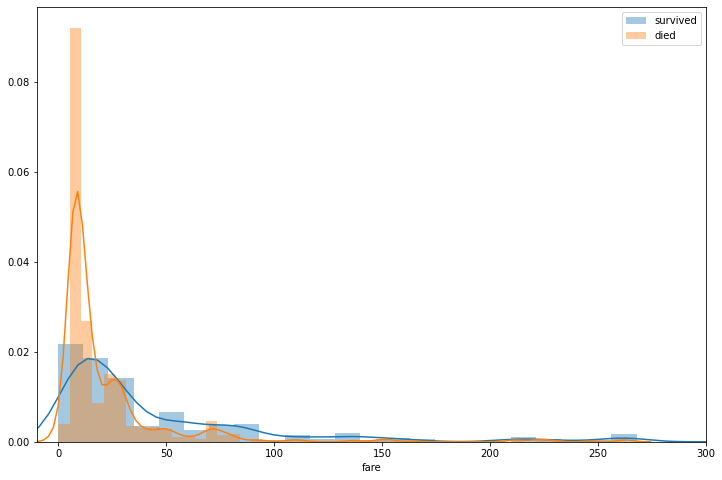

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
mask = y == 1
ax = sns.distplot(X[mask].fare, label='survived')
ax = sns.distplot(X[~mask].fare, label='died')
ax.set_xlim(-10, 300)
ax.legend()
fig.savefig("images/eda_histogram2.png", dpi=300, bbox_inches='tight')

## Scatter Plot
A scatter plot shows the relationship between two numeric columns.

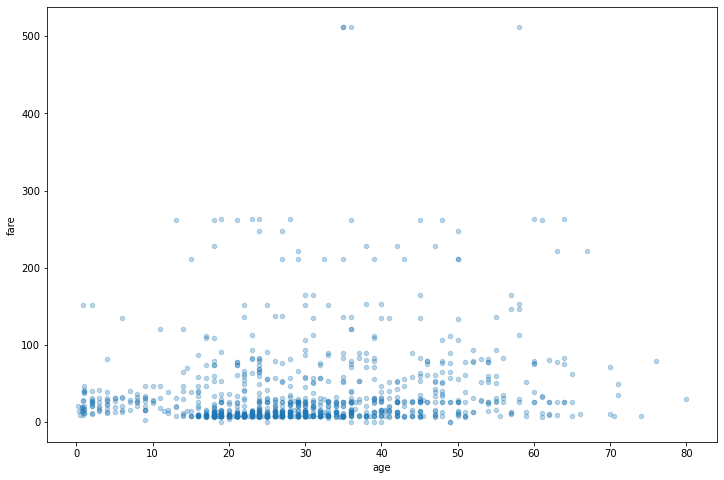

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
X.plot.scatter(x="age", y="fare", ax=ax, alpha=0.3)
fig.savefig("images/eda_scatter.png", dpi=300)

## Joint Plot

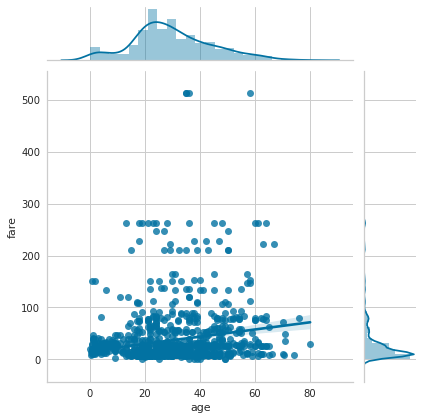

In [44]:
from seaborn import jointplot

# https://seaborn.pydata.org/generated/seaborn.jointplot.html

p = jointplot("age", "fare", data=X, kind="reg")
p.savefig("images/eda_joint_plot.png", dpi=300)

## Pair Grid
This plot is a matrix of columns and kernel density estimations. To color by a column from a DataFrame, use the `hue` parameter. By coloring with the target, we can see if features have different effects on the target.

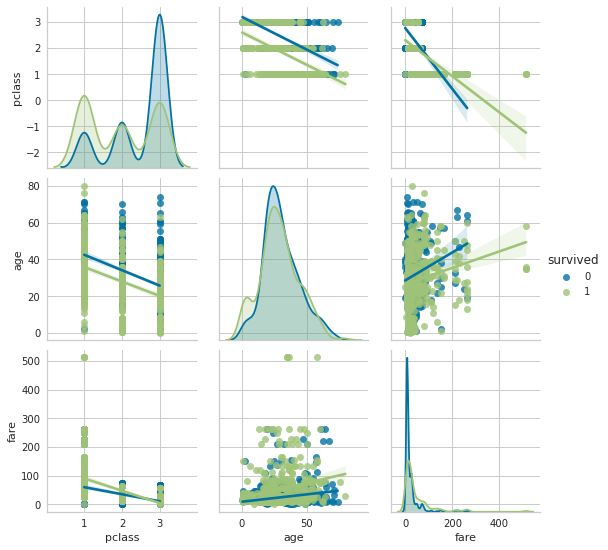

In [48]:
from seaborn import pairplot

vars = ["pclass", "age", "fare"]
p = pairplot(df, vars=vars, hue="survived", kind="reg")
p.savefig("images/eda_pair_grid.png", dpi=300)

## Box and Violin Plots
Plots to visualize distributions.

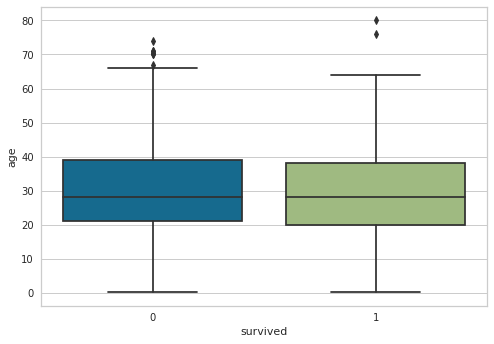

In [49]:
from seaborn import boxplot

boxplot(x="survived", y="age", data=df)
p.savefig("images/eda_box_plot.png", dpi=300)

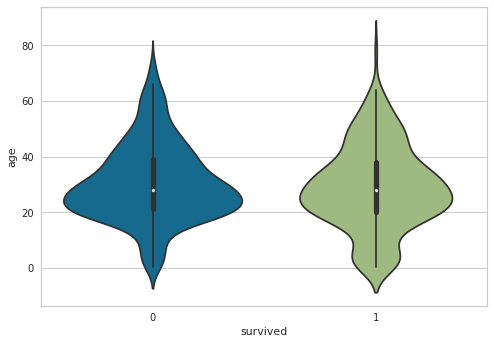

In [51]:
from seaborn import violinplot

violinplot(x="survived", y="age", data=df)
p.savefig("images/eda_violin_plot.png", dpi=300)

## Comparing Two Ordinal Values
Here is pandas code to compare two ordinal categories. I’m simulating that by binning age into ten quantiles, and pclass into three bins. The plot is normalized so it fills all of the vertical area. This makes it easy to see that in the 40% quantile most of the tickets were in 3rd class.

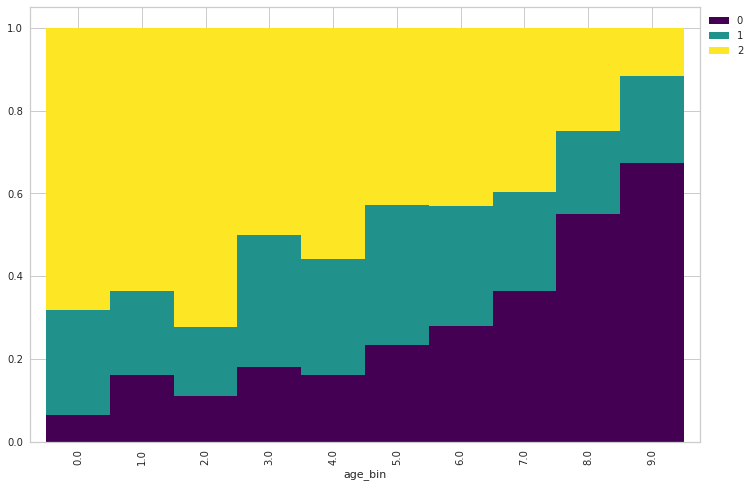

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
(
    X.assign(
        age_bin=pd.qcut(
            X.age, q=10, labels=False
        ),
        class_bin=pd.cut(
            X.pclass, bins=3, labels=False
        ),

    )
    #.groupby(["age_bin", "class_bin"])
    #.size()
    #.unstack()
    .pipe(lambda df: pd.crosstab(df.age_bin, df.class_bin)) # replaces 3 lines above
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(
        stacked=True,
        width=1,
        ax=ax,
        cmap="viridis",
    )
    .legend(bbox_to_anchor=(1, 1))
)
fig.savefig("images/eda_two_ordinal.png", dpi=300)

## Correlation

In [39]:
# Pearson correlation
X.age.corr(X.fare)

0.17873932314646115

In [58]:
X.corr()

,pclass,age,sibsp,parch,fare,body
pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.034642
age,-0.408106,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [57]:
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.408106
age,-0.408106,1.000000
sibsp,0.060832,-0.243699
parch,0.018322,-0.150917
fare,-0.558629,0.178739
body,-0.034642,0.058809


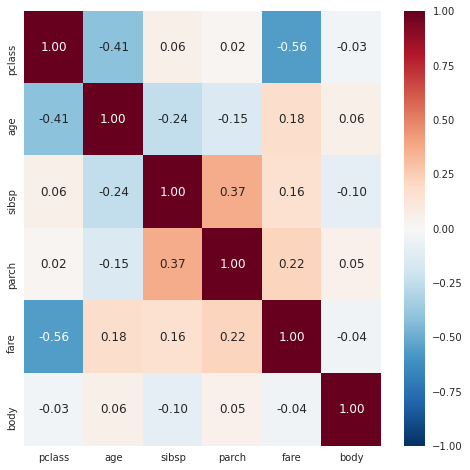

In [56]:
from seaborn import heatmap

fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(X.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1,)
fig.savefig("images/eda_correlation1.png", dpi=300)

## RadViz
A RadViz plot shows each sample on a circle, with the features on the circumference. The values are normalized, and you can imagine that each figure has a spring that pulls samples to it based on the value. This is one technique to visualize separability between the targets.

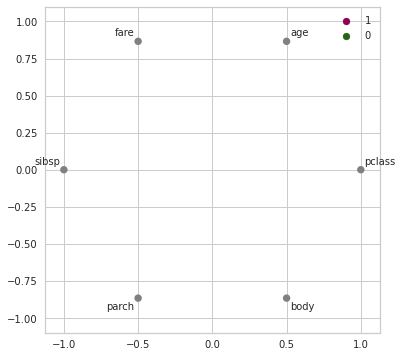

In [76]:
from pandas.plotting import radviz

vars = ["pclass", "age", "fare", "sibsp", "parch", "body", "survived"]
Xnum = df[vars].copy()
fig, ax = plt.subplots(figsize=(6, 6))
radviz(Xnum, "survived", ax=ax, colormap="PiYG")
fig.savefig("images/eda_radviz.png", dpi=300)

## Parallel Coordinates
For multivariate data, you can use a parallel coordinates plot to see clustering visually.

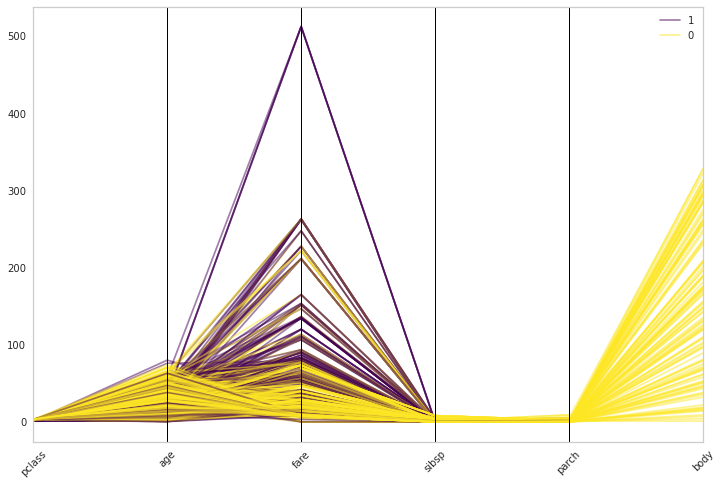

In [78]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(12, 8))
parallel_coordinates(Xnum, "survived", ax=ax, colormap="viridis", alpha=0.5,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.savefig("images/eda_parallel.png", dpi=300)